In [1]:
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage import io


In [2]:
def get_balanced_vmin_and_vmax(ratio_array):
    """return a vmin and vmax equally far from 1.0"""
    
    ## Determine how far away from baseline these values are
    min_diff = round(1 - ratio_array.min(), 2)
    max_diff = round(ratio_array.max() - 1, 2)
    
    ## Determine which to keep as deviation from baseline
    even_diff = max(min_diff, max_diff)
    
    vmin = round(1 - even_diff, 2)
    vmax = round(1 + even_diff, 2)
    
    return vmin, vmax    

In [3]:
def side_by_side_plot(fileA, fileB, titleA, titleB):
    A_array = io.imread(fileA)
    B_array = io.imread(fileB)
    ratio_array = A_array / B_array
    
    ## max_of_AB ensures the colorbar will have same bounds
    max_of_AB = max(A_array.max(),B_array.max())
    
    (vmin, vmax) = get_balanced_vmin_and_vmax(ratio_array)
    
    #### Begin plotting
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(7,7))
    
    ### A_array
    axes[0, 0].set_title(titleA)
    A_im = axes[0, 0].imshow(A_array,
                      norm = colors.LogNorm(vmin=50, vmax=max_of_AB)
                     )
    axes[0,0].axis('off')
    divider = make_axes_locatable(axes[0,0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(A_im, cax=cax)
    
    ### B_array
    axes[0,1].set_title(titleB)
    B_im = axes[0,1].imshow(B_array,
                    norm = colors.LogNorm(vmin=50, vmax=max_of_AB)
                    )
    axes[0,1].axis('off')
    divider = make_axes_locatable(axes[0,1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(B_im, cax=cax)
    
    
    ### Ratio
    axes[1,0].set_title('ratio: top-left / top-right')
    R_im = axes[1,0].imshow(ratio_array,
                     cmap="coolwarm",
                     vmin=vmin,
                     vmax=vmax,
                    )
    axes[1,0].axis('off')
    divider = make_axes_locatable(axes[1,0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(R_im, cax=cax)
    
    axes[1,1].hist(ratio_array.flatten(), bins=30)
    axes[1,1].set_title("Ratio pixels")
    fig.tight_layout()

# Parameters

- model vs blind

- Regularization: 
    - None
    - entropy
    - TV

## Compare  model vs blind holding background parameter constant

Overall, fairly similar. No deviations beyond 1% for any these

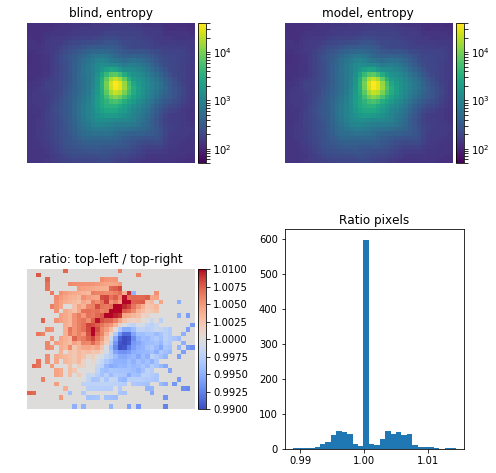

In [4]:
side_by_side_plot("./data/MAX_Total_PSF-decon_blind_entropyreg_automatic-crop.tif",
                  "./data/MAX_Total_PSF-decon_model_entropyreg_automatic-crop.tif",
                  "blind, entropy",
                  "model, entropy")

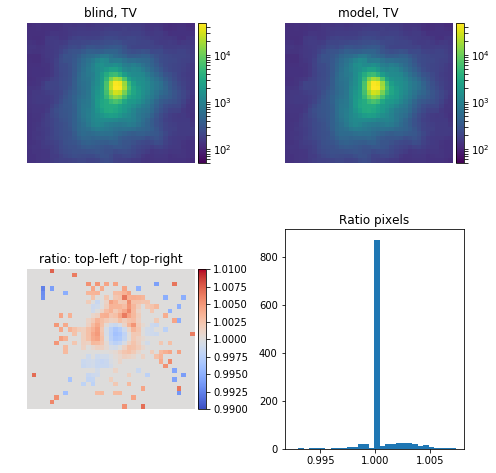

In [5]:
side_by_side_plot("./data/MAX_Total_PSF-decon_blind_TVreg_automatic-crop.tif",
                  "./data/MAX_Total_PSF-decon_model_TVreg_automatic-crop.tif",
                  "blind, TV",
                  "model, TV")

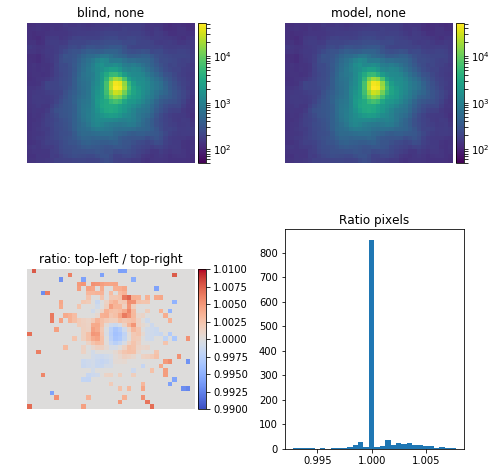

In [6]:
side_by_side_plot("./data/MAX_Total_PSF-decon_blind_none-crop.tif",
                  "./data/MAX_Total_PSF-decon_model_none-crop.tif",
                  "blind, none",
                  "model, none")

Since we see that there isn't much difference between model/blind, let's now compare and contrast different regularizations for blind deconvolution.

## Compare different background parameters

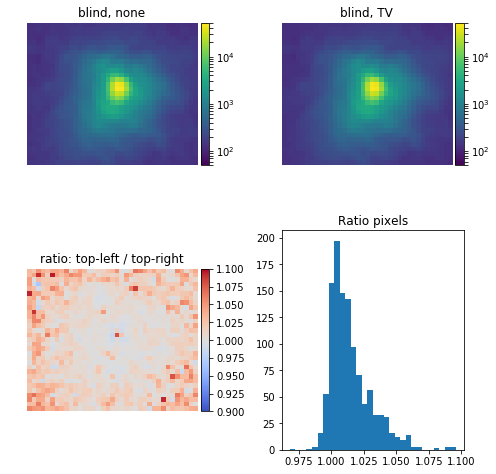

In [7]:
side_by_side_plot("./data/MAX_Total_PSF-decon_blind_none-crop.tif",
                  "./data/MAX_Total_PSF-decon_blind_TVreg_automatic-crop.tif",
                  "blind, none",
                  "blind, TV")

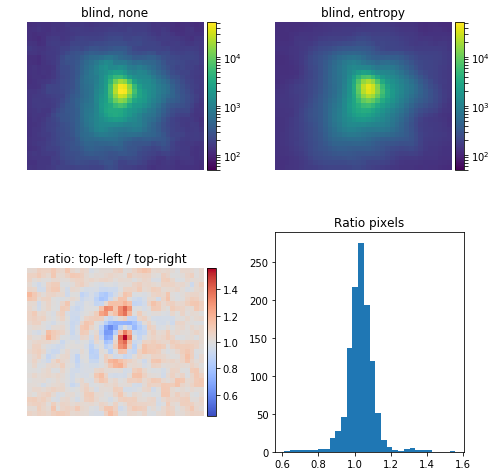

In [12]:
side_by_side_plot("./data/MAX_Total_PSF-decon_blind_none-crop.tif",
                  "./data/MAX_Total_PSF-decon_blind_entropyreg_automatic-crop.tif",
                  "blind, none",
                  "blind, entropy")

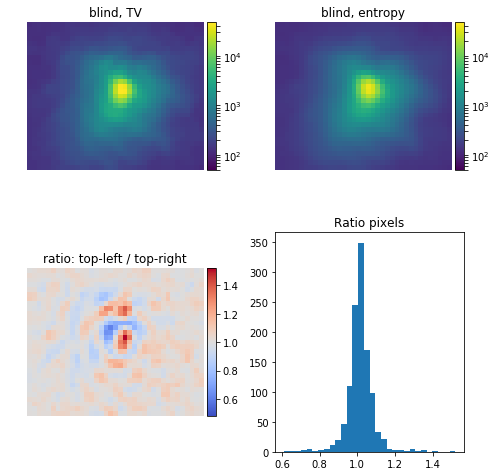

In [13]:
side_by_side_plot("./data/MAX_Total_PSF-decon_blind_TVreg_automatic-crop.tif",
                  "./data/MAX_Total_PSF-decon_blind_entropyreg_automatic-crop.tif",
                  "blind, TV","blind, entropy")

Entropy regularization do not agree well with `none` and `TV`. Is the selection of entropy regularization more correct or more wrong?

In [2]:
## Currently unused
def str_diff(str_A, str_B):
    """ Returns diff of two strings (assuming same length)
    
    >>> a = "/data/test/blind.tif"
    >>> b = "/data/test/model.tif"
    >>> str_diff(a, b)
    ('blind', 'model')
    """
    diff_A_list = []
    diff_B_list = []
    
    for a, b in zip(str_A, str_B):
        if a != b:
            diff_A_list.append(a)
            diff_B_list.append(b)
            
    diff_A = "".join(diff_A_list)
    diff_B = "".join(diff_B_list)
    
    return diff_A, diff_B